In [29]:
%matplotlib inline
import csv
from matplotlib import pyplot as plt
import numpy as np

In [4]:
col_names = next(evaluations_reader)
col_names

['vocabulary_builder',
 'comment',
 'arguments',
 'vocabulary_length',
 'tr_set_size',
 'te_set_size',
 'standard_accuracy',
 'uniform_accuracy']

In [107]:
evaluations = {}
file_names = ["evaluation_cc-based overall_19-11-2016_17-25",
              "evaluation_cc-based_19-11-2016_16-29",
              "evaluation_ig-based non uniform_19-11-2016_17-01",
              "evaluation_most-common_19-11-2016_16-49",
              "evaluation_xi-square overall_19-11-2016_17-20",
              "evaluation_xi-square_19-11-2016_17-26",
             ]
for file_name in file_names:
    evaluations_file = open("vacabulary_test_results/"+file_name+".csv", "r")
    evaluations_reader = csv.reader(evaluations_file)
    next(evaluations_reader)
    for row in evaluations_reader:
        if not (row[0] in evaluations.keys()): evaluations[row[0]] = []
        evaluations[row[0]] += [{c: r for c, r in zip(col_names[1:], row[1:])}]

In [108]:
evaluations.keys()

dict_keys(['ig-based non uniform', 'xi-square', 'xi-square overall', 'cc-based overall', 'cc-based', 'most-common'])

In [109]:
x, y, z = {}, {}, {}
for key in evaluations.keys():
    x[key] = [ int(e["vocabulary_length"]) for e in evaluations[key] ]
    y[key] = [ float(e["standard_accuracy"]) for e in evaluations[key] ]
    z[key] = [ float(e["uniform_accuracy"]) for e in evaluations[key] ]

In [110]:
len(x["most-common"]), len(y["most-common"])

(9, 9)

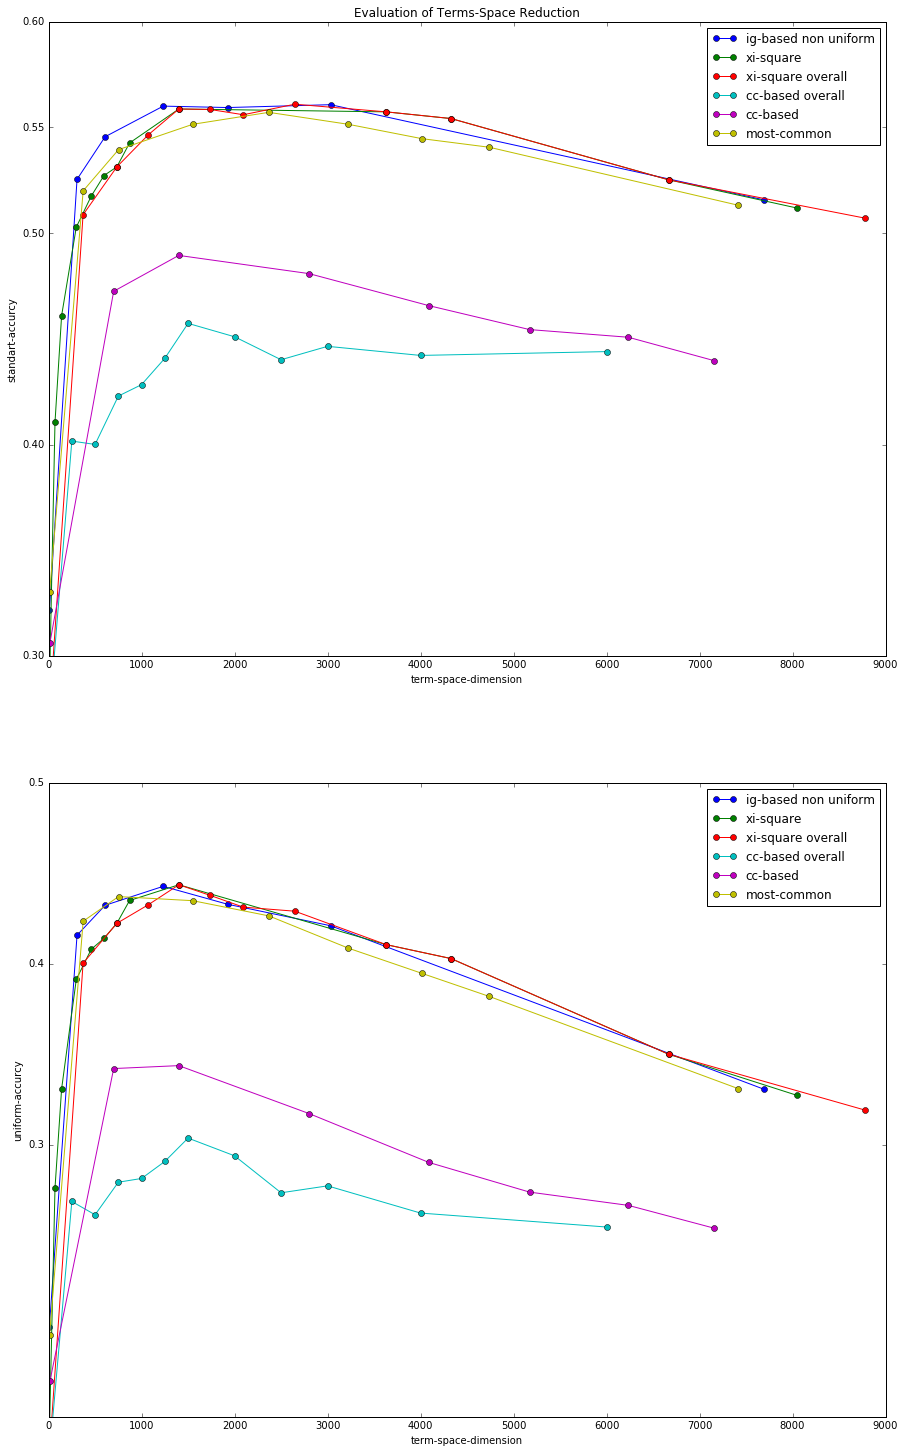

In [112]:
fig = plt.figure()
fig.set_size_inches(15,25)

ax_st = fig.add_subplot(211)
ax_un = fig.add_subplot(212)

ax_st.set_ylim((0.3, 0.6))
ax_un.set_ylim((0.15, 0.45))

for key in list(evaluations.keys()):
    ax_st.plot(x[key],y[key],"o-", label=key)
    ax_un.plot(x[key],z[key],"o-", label=key)

ax_st.set_title("Evaluation of Terms-Space Reduction")

ax_st.set_xlabel("term-space-dimension")
ax_st.set_ylabel("standart-accurcy")

ax_un.set_xlabel("term-space-dimension")
ax_un.set_ylabel("uniform-accurcy")

ax_st.set_yticks((0.3,0.4,0.5,0.55,0.6))
ax_un.set_yticks((0.3,0.4,0.5))

ax_st.legend()
ax_un.legend()

In [91]:
import csv, importlib
import categories
import corpus as corpus_class
import filters, vocabulary_builders, vocabulary_tester

cats = categories.categories()
corpus = corpus_class.corpus(cats)
corpus.load("question_train.csv", "question_category_train.csv")

sentence_filters = [filters.punctuation_filter]
word_filters = [filters.small_word_filter, filters.stopword_filter, filters.stemming_filter]

corpus.process(sentence_filters, word_filters, tr_set_size=10000)

In [95]:
import pickle
corpus_file = open("corpus.pkl", "wb+")
pickle.dump(corpus,corpus_file)

In [97]:
corpus_file = open("corpus.pkl", "rb")
co_copy = pickle.load(corpus_file)